In [27]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seawater as sw
import scipy.signal as signal

In [28]:
# import the Tokyo cruise data
inputdata = '/Users/sclayton/Documents/seaflow/data/tokyo_underway/Tokyo_underway_chl1.csv'
data = pd.read_csv(inputdata)
print data.columns
print data['date.1']

Index([u'date.1', u'time.1', u'long.dc', u'lat.dc', u'T1', u'S', u'chl'], dtype='object')
0     160511
1     160511
2     160511
3     160511
4     160511
5     160511
6     160511
7     160511
8     160511
9     160511
10    160511
11    160511
12    160511
13    160511
14    160511
...
879266    300511
879267    300511
879268    300511
879269    300511
879270    300511
879271    300511
879272    300511
879273    300511
879274    300511
879275    300511
879276    300511
879277    300511
879278    300511
879279    300511
879280    300511
Name: date.1, Length: 879281, dtype: int64


In [29]:
x = (data['long.dc']).values # longitude
y = (data['lat.dc']).values # latitude

# convert all longitude to longitude east
x[x<0]= 360+x[x<0];
xew = x
xew[xew>180] = xew[xew>180]-360

distance = sw.dist(y, x)[0]
track = np.cumsum(distance)
track = np.insert(track, 0, 0)

In [30]:
# calculate density
T = data['T1'].values
S = data['S'].values
D = sw.dens(T,S,0)
C = data['chl'].values


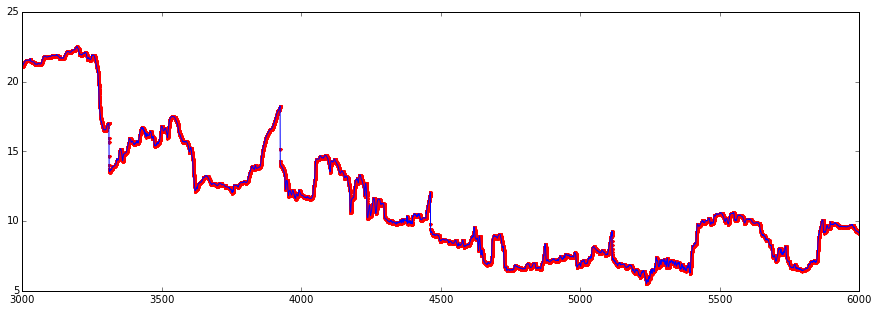

In [31]:
# interpolate the data onto a regular 0.1 km grid
smoothdist = 0.25
xsmooth = np.arange(0,np.floor(np.max(track)), smoothdist)
Tsmooth = np.interp(xsmooth,track,T)

csmoothdist = 50
xcsmooth = np.arange(0,np.floor(np.max(track)),csmoothdist)
Csmooth = np.interp(xcsmooth,track, C)


fig1 = plt.figure(1, figsize=(15,5))
plt.plot(track, T,'.r',xsmooth,Tsmooth)
plt.axis([3000, 6000, 5, 25])
plt.show()

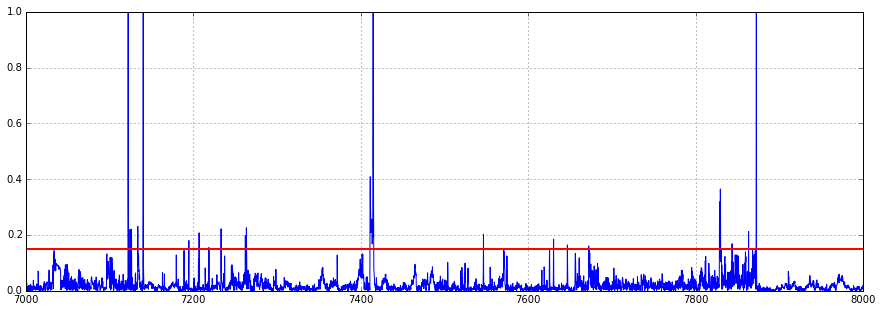

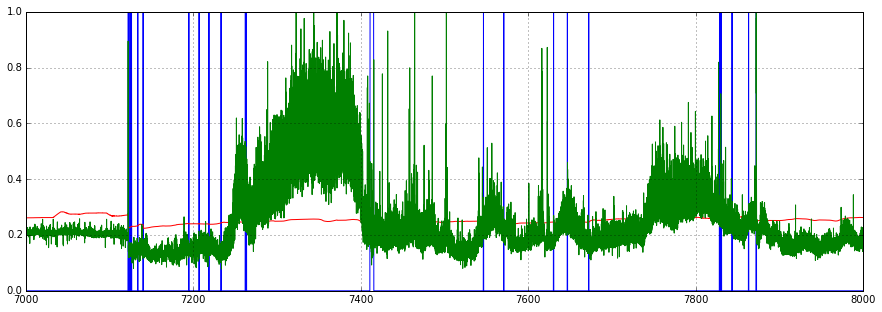

In [32]:
# gradients
dD = (D[1:len(D)]-D[:len(D)-1])/distance
dS = (S[1:len(S)]-S[:len(S)-1])/distance
dT = (Tsmooth[1:len(Tsmooth)]-Tsmooth[:len(Tsmooth)-1])/smoothdist

# calculate point along track where gradient is calculated
dD_track = track[0:len(track)-1]+distance/2
dD_smooth = xsmooth[0:len(xsmooth)-1]+smoothdist/2

# look for fronts
front_param = 0.15

fig1 = plt.figure(1, figsize=(15,5))
plt.plot(dD_smooth, abs(dT))
plt.axhline(y=front_param,linewidth=2, color='r')
plt.grid(True)
plt.axis([7000,8000, 0, 1])
plt.show()


front = np.zeros(len(dT))
front[(abs(dT))>front_param] = 1

fig2 = plt.figure(2, figsize=(15,5))
plt.plot(dD_smooth,front,track,T*0.025,'-r',track,C*0.5,'-g')
plt.axis([7000,8000, 0, 1])
plt.grid(True)
plt.show()

# how many front are there in the dataset and how wide are they?

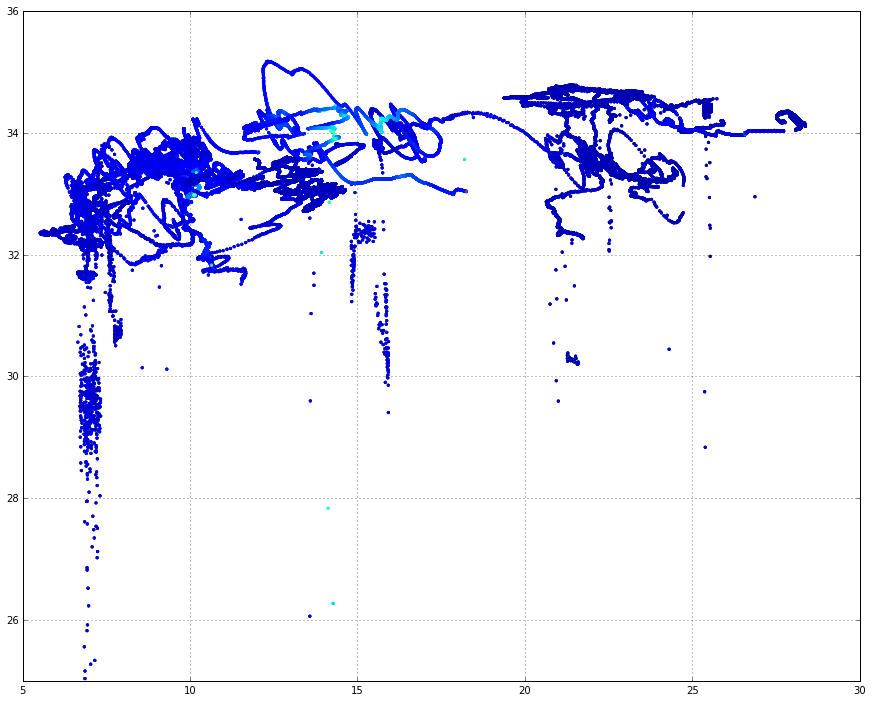

In [33]:
fig3 = plt.figure(3, figsize=(15,12))
plt.scatter(T,S,s=10,c=C,lw=0,alpha=0.5)
plt.axis([5,30,25,36])
plt.grid(True)
plt.show()

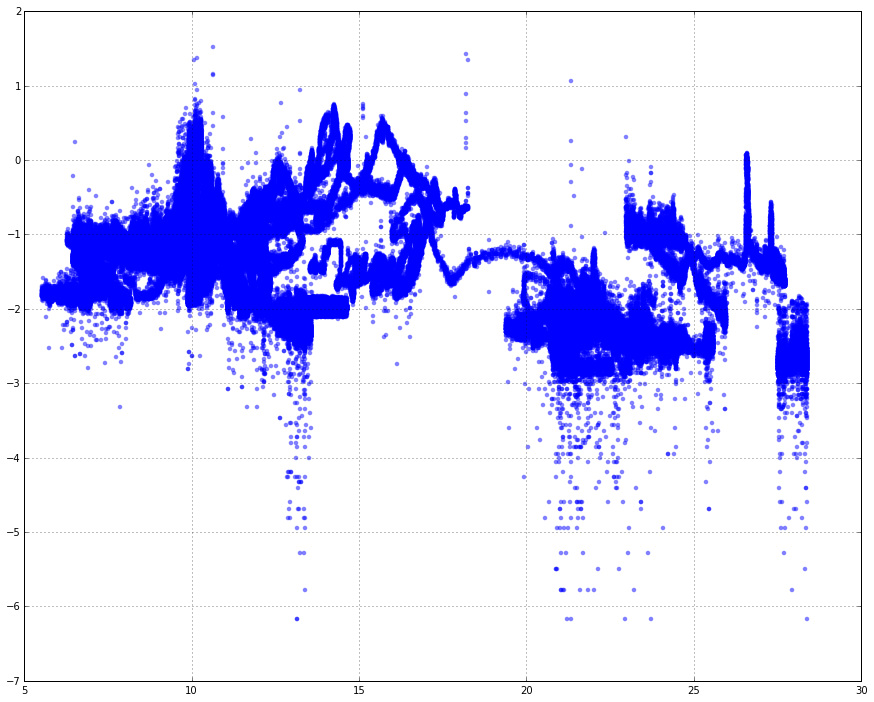

In [34]:
fig4 = plt.figure(3, figsize=(15,12))
plt.scatter(T,np.log(C),lw=0,alpha=0.5)
plt.axis([5,30,-7,2])
plt.grid(True)
plt.show()